In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,StandardScaler,OneHotEncoder,KBinsDiscretizer,PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [17]:
df = pd.read_csv("titanic.csv")
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
x_train,x_test,y_train,y_test = train_test_split(df.drop("Survived",axis=1),df["Survived"],test_size=0.2,random_state=42)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S
270,1,male,NaN,0,0,31.0000,S
860,3,male,41.0,2,0,14.1083,S
435,1,female,14.0,1,2,120.0000,S


In [169]:
def ans(n,encode,s):
    num_cols = [v for v in x_train.columns if df[v].dtype in ["int64","float64"]]
    cat_cols = [v for v in x_train.columns if df[v].dtype in ["object"]]
    age_col = num_cols.pop(num_cols.index('Age'))
    num_transform = Pipeline(
        steps=[
            ("imp",SimpleImputer(strategy='median')),
            ('scl',StandardScaler(with_mean=False))    
        ]
    )

    cat_transform =  Pipeline(
        steps=[
            ("ohe",OneHotEncoder(handle_unknown='ignore')),
            ('imp',SimpleImputer(strategy='most_frequent')),
            ('scl',StandardScaler(with_mean=False))      
        ]
    )

    age_transformer = Pipeline(
        steps=[
            ("imp", SimpleImputer(strategy='median')),
            ("bin", KBinsDiscretizer(n_bins=n, encode=encode, strategy=s,subsample=200_000)),
            ("scl", StandardScaler(with_mean=False)),
            ('power_trs',PowerTransformer())
        ]
    )




    preprocessor = ColumnTransformer(
         transformers=[
            ("num",num_transform,num_cols),
            ("cat",cat_transform,cat_cols),
            ("age",age_transformer,[age_col])
        ]
    )

    model = KNeighborsClassifier(n_neighbors=10)

    pip_model = Pipeline(
        steps=[
            ("pre",preprocessor),
            ("model",model)
        ]
    )

    pip_model.fit(x_train,y_train)
    ans = pip_model.predict(x_test)
    print("accuracy:- ",accuracy_score(y_test, ans))
    cross = cross_val_score(pip_model,x_train,y_train,cv=10).mean()
    print("cross score:- ",cross)





# ------------------------------------ For Diagrame ------------------------------
    imp = SimpleImputer(strategy='most_frequent')
    age_imp = pd.DataFrame(imp.fit_transform(x_train[["Age"]]), columns=['Age'])
    bin = KBinsDiscretizer(n_bins=n, encode=encode, strategy=s,subsample=200_000)
    age_train_transformer = pd.DataFrame(bin.fit_transform(age_imp), columns=['Age_binned'])

    power = PowerTransformer()
# age_train_transformer = pd.DataFrame(power.fit_transform(age_train_transformer), columns=['Age_binned'])
    fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(20,10))
    sns.histplot(x_train[['Age']],ax=ax1)
    sns.histplot(age_train_transformer,ax=ax2)

    fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(20,10))
    sns.kdeplot(x_train[['Age']],ax=ax1)
    sns.kdeplot(age_train_transformer,ax=ax2)

<h3>uniform binning</h3>
=> max-min/bin <br>
=> outliner get contol but sprad of data is remain same

accuracy:-  0.8044692737430168
cross score:-  0.8300469483568076


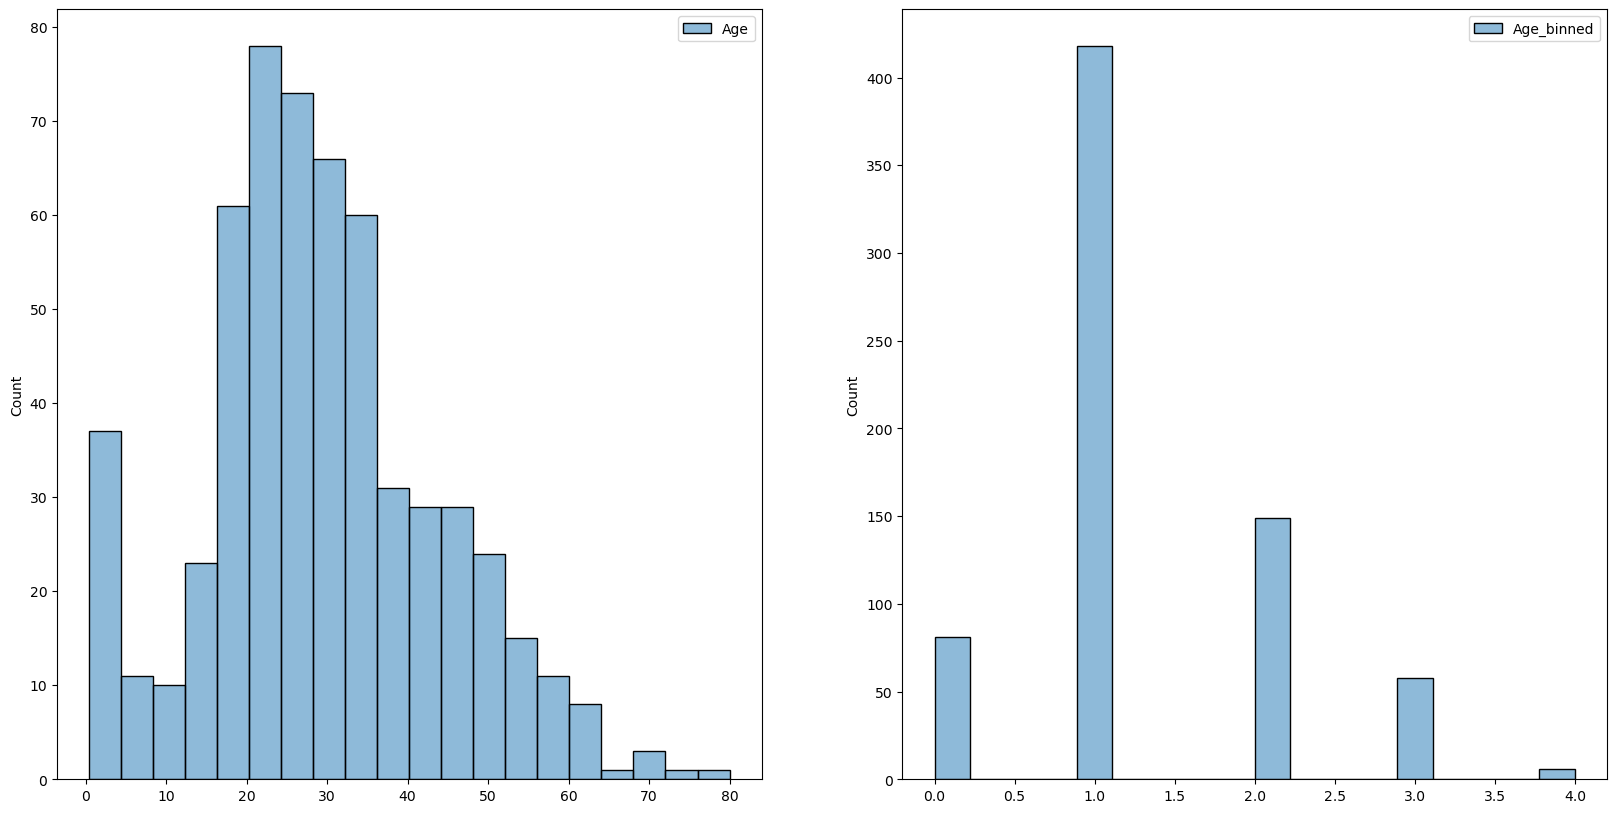

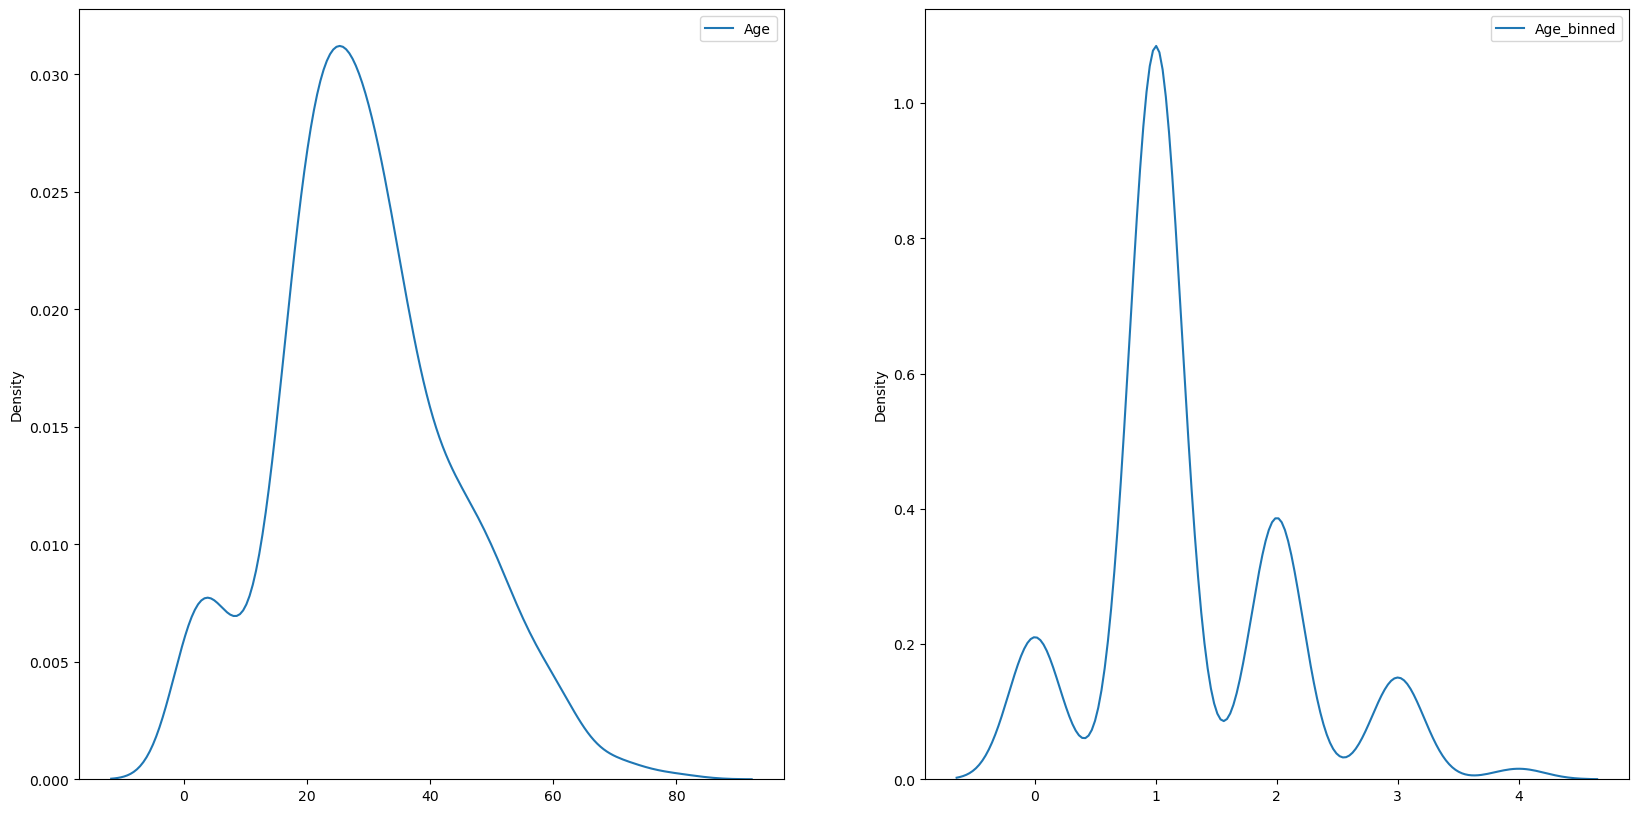

In [170]:
ans(5,"ordinal","uniform")

<h3>quantile binning</h3>
=> outlier get contol and the age data get sprad
<br>
=> 4 bin (25% , 50% , 75%)  10 bin (10% ,20% , 30%...100%)
<br>
=> 10 bin nor work in this data as there is small rows

accuracy:-  0.8156424581005587
cross score:-  0.813223787167449


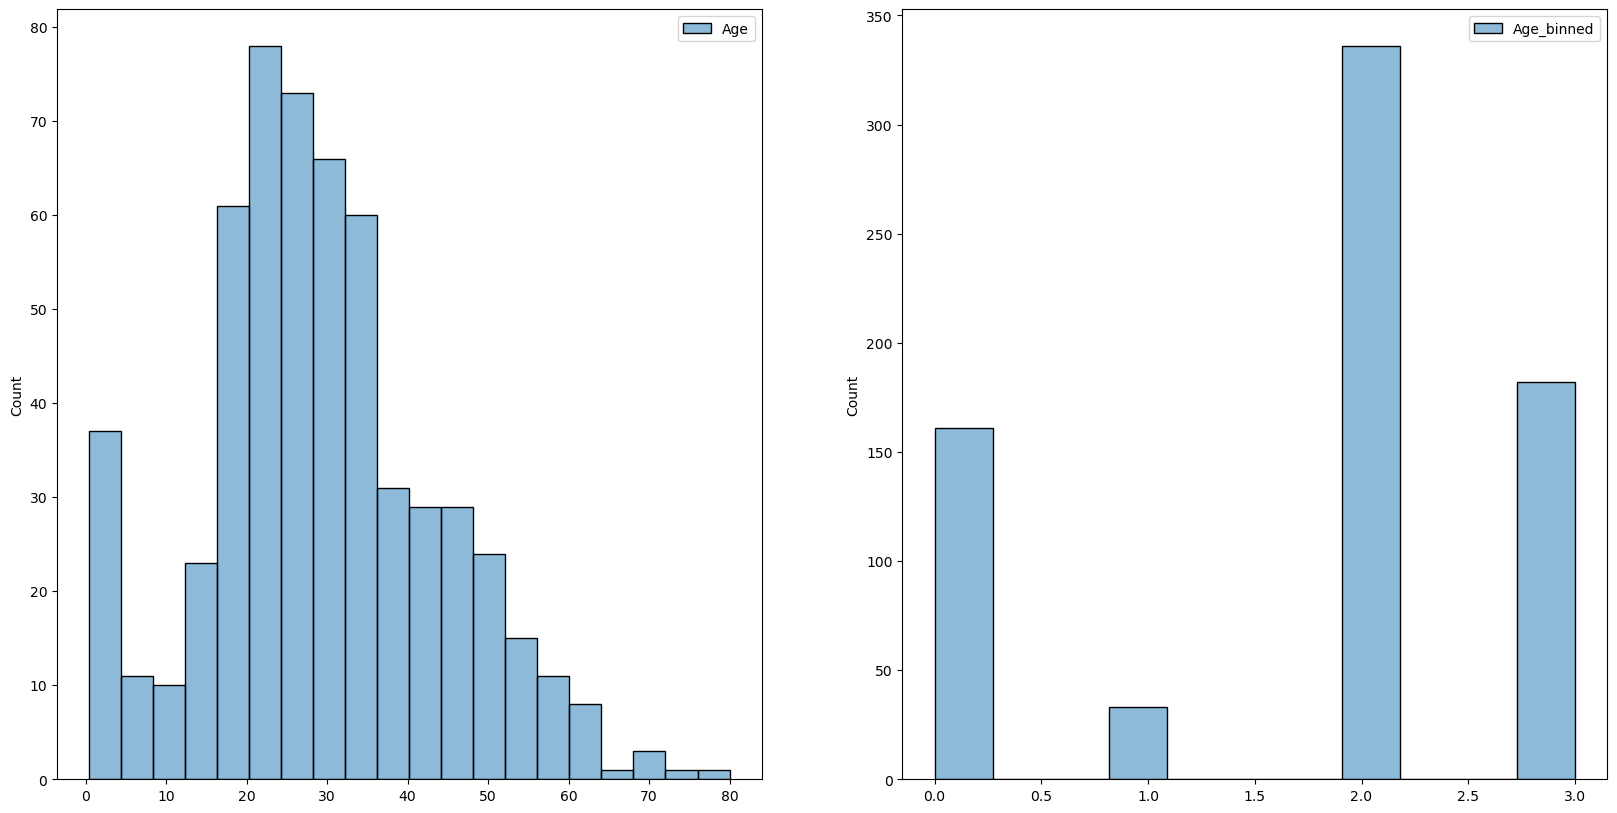

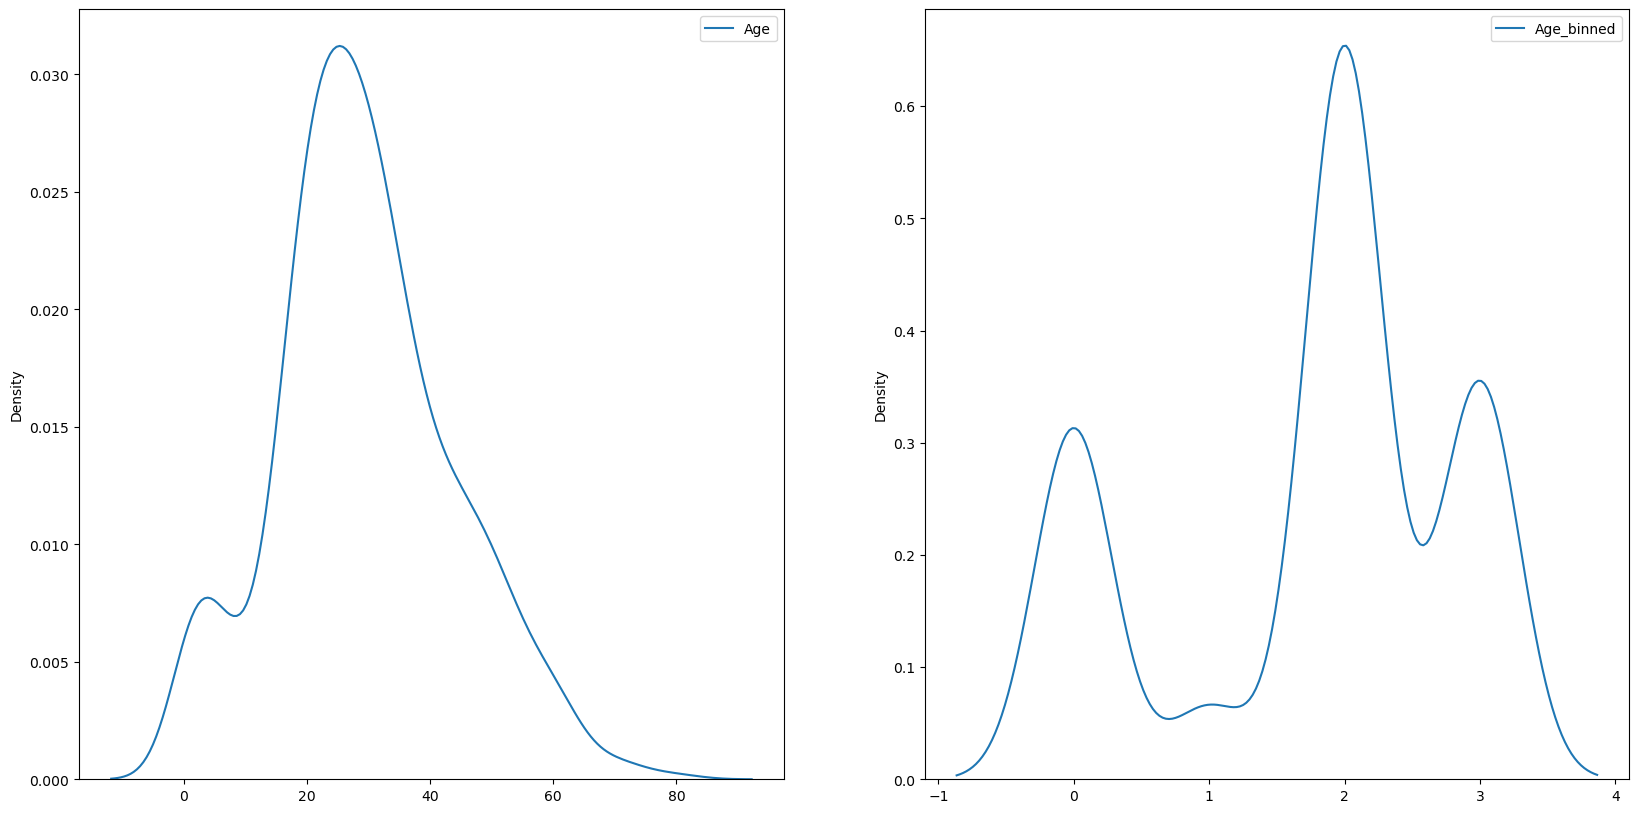

In [171]:
ans(4,"ordinal","quantile")

<h3>kmeans binning</h3>
=>use when data is scatter clusterly ( means data per hm cluster bna pawe)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


accuracy:-  0.8100558659217877


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

cross score:-  0.815962441314554


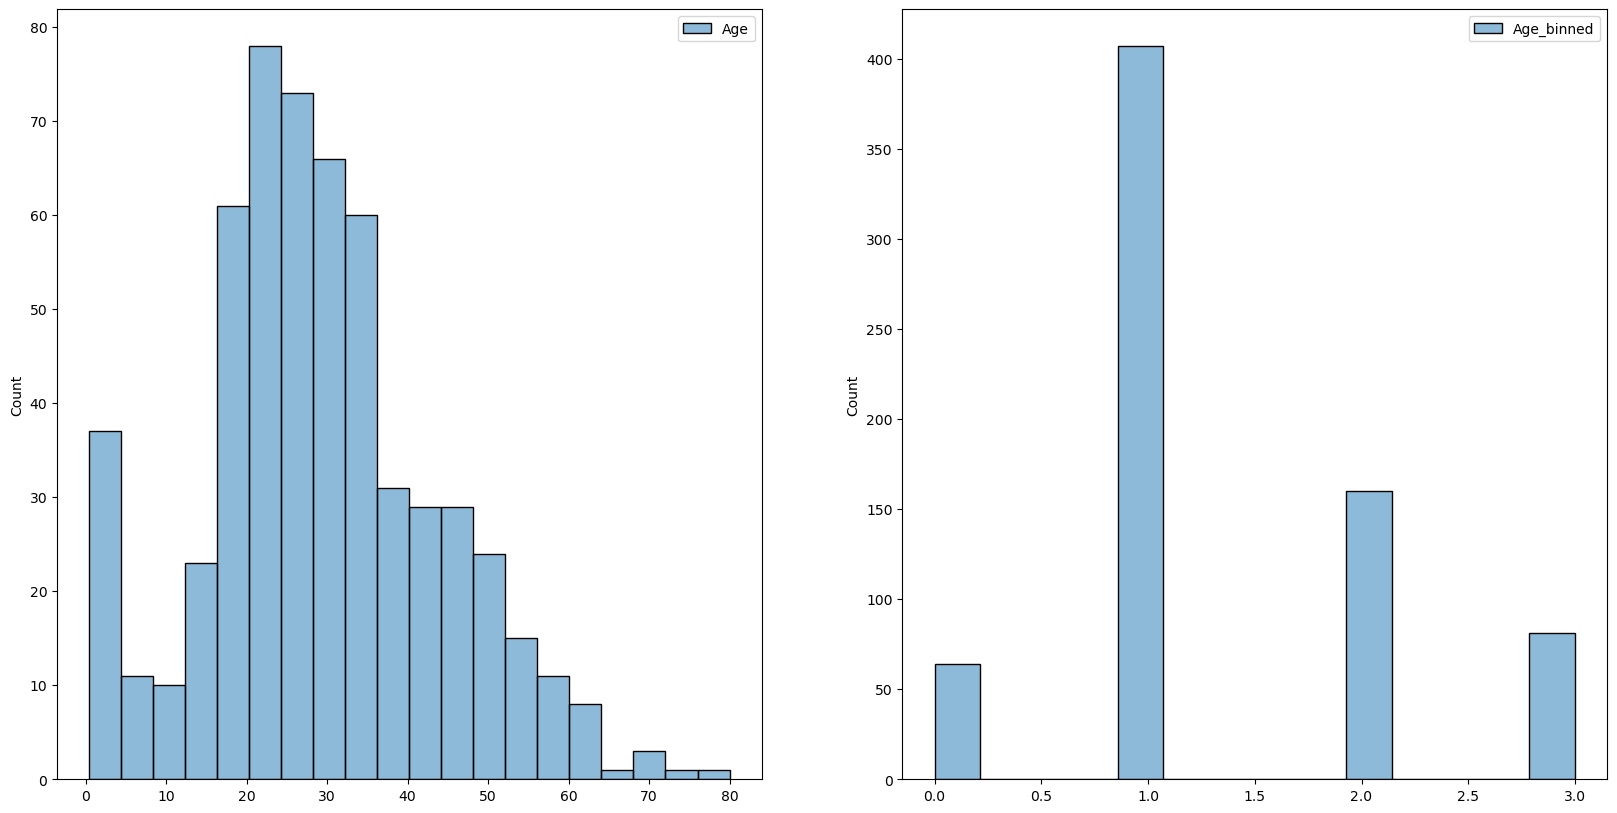

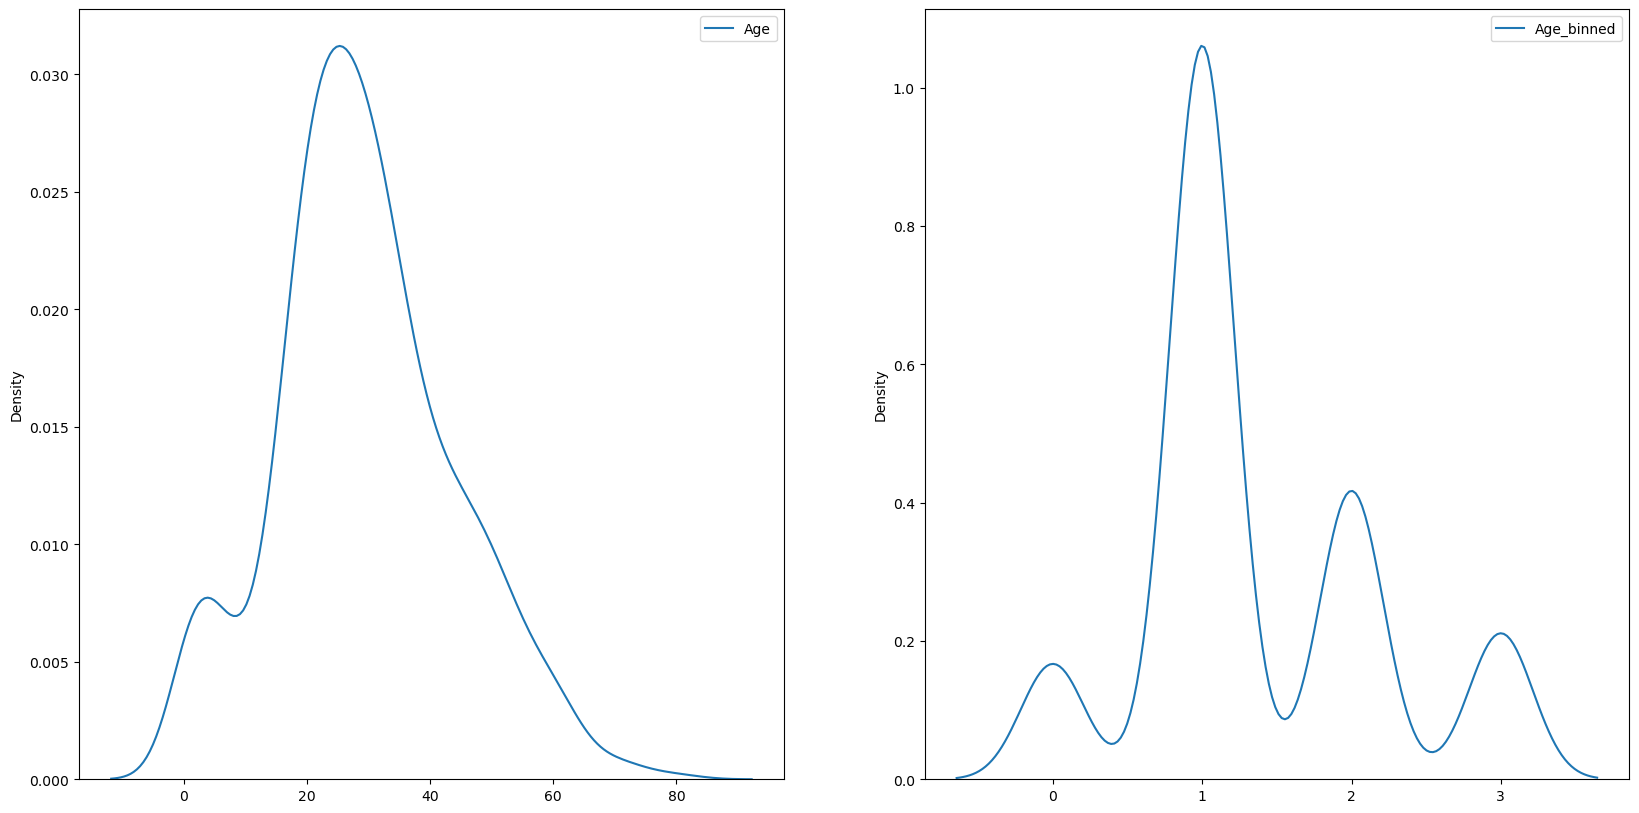

In [172]:
ans(4,"ordinal","kmeans")